<a href="https://colab.research.google.com/github/OlivlfilipeOliveira/AtividadeS9-quest-o2/blob/main/Quest%C3%A3o_3_Atividade_S9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Questão 2 - Atividade de Planejamento de experimentos (S9)**

**Nome:** Filipe da Silva Oliveira

**Professora:** Raquel Cabral

**Curso:** Ciência da Computação

**Disciplina:** Planejamento de Experimentos

**Período:** 2020.1


In [ ]:
#Importando bibliotecas para conseguir executar as tarefas da questões.
import matplotlib.pyplot as plt #plotagem de gráficos
from scipy import stats #biblioteca que possue algumas funções de estatística
import numpy as np #algumas funções matemáticas
import pandas as pd #manipulação de dados
from sklearn.linear_model import LinearRegression #um biblioteca de aprendizado de máquina, que trabalha com regressão linear
import statsmodels.api as sm #trabalha com geração de modelos

# **Questão 2:**

a) Faça os testes visuais para verificar se a regressão é adequada a esses dados.

In [ ]:
tamanho = [128, 256, 384, 512, 640, 768, 896, 1024]

observacao1 = [386, 850, 1544, 3035, 6650, 13887, 28059, 50916]
observacao2 = [375, 805, 1644, 3123, 6839, 14567, 27439, 52129]
observacao3 = [393, 824, 1553, 3235, 6768, 13456, 27659, 51360]

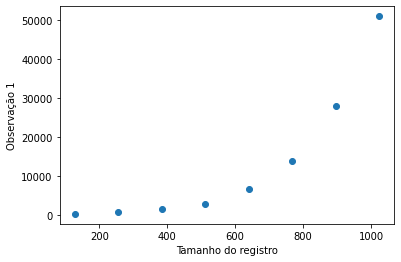

In [ ]:
plt.scatter(tamanho, observacao1)
plt.xlabel("Tamanho do registro")
plt.ylabel("Observação 1")
plt.show()

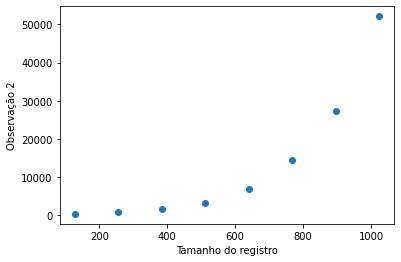

In [ ]:
plt.scatter(tamanho, observacao2)
plt.xlabel("Tamanho do registro")
plt.ylabel("Observação 2")
plt.show()

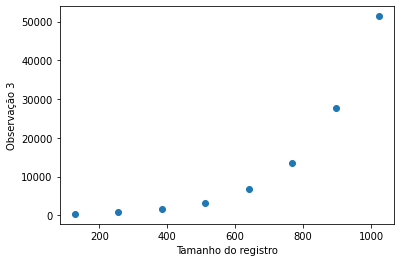

In [ ]:
plt.scatter(tamanho, observacao3)
plt.xlabel("Tamanho do registro")
plt.ylabel("Observação 3")
plt.show()

R: Observando os gráficos é possível identificar que os valores aparentam não estae relacionados, então a regressão não seria adequada para tais dados.  

b) Ajuste um modelo de regressão linear a esses dados.

In [ ]:
b1, b0, r_value, p_value, std_err =  stats.linregress(tamanho, observacao2)


b1, b0 

(50.030970982142854, -15452.714285714283)

O modelo ajustado para o tamanho e a segunda observação seria: yestimado = -15452.714285714283 + 50.030970982142854*tamanho

c) Qual a porcentagem da variação é explicada pela regressão? Você está satisfeito com seu modelo? Se não, qual seria o seu próximo passo. 

In [ ]:
# variável preditora
X = np.array(tamanho)
# variável alvo
y = np.array(observacao2)

In [ ]:
# é necessário adicionar uma constante a matriz X
x_c = sm.add_constant(X)
# OLS vem de Ordinary Least Squares e o método fit irá treinar o modelo
model = sm.OLS(y, x_c)
results = model.fit()
# mostrando as estatísticas do modelo
results.summary()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     17.48
Date:                Thu, 29 Apr 2021   Prob (F-statistic):            0.00580
Time:                        18:10:22   Log-Likelihood:                -83.824
No. Observations:                   8   AIC:                             171.6
Df Residuals:                       6   BIC:                             171.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.545e+04   7733.806     -1.998      0.093   -3.44e+04    3471.228
x1            50.0310     11.965      4.181      0.006      20.754      79.308
==============================================================================
Omnibus:                        1.234   Durbin-Watson:                   0.805
Prob(Omnibus):                  0.540   Jarque-Bera (JB):                0.801
Skew:                           0.663   Prob(JB):                        0.670
Kurtosis:                       2.196   Cond. No.                     1.42e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Qual a porcentagem da variação é explicada pela regressão?


Observando a tabela acima, temos que o valor da porcentagem de variação é dado por 0.74, ou seja 74%. #R-squared

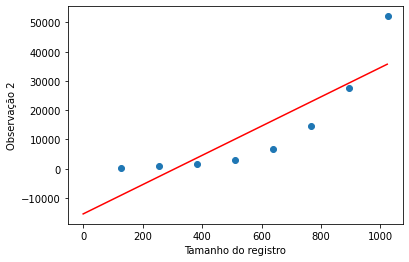

In [ ]:
linha = [b1*i + b0 for i in range(max(tamanho))]

plt.scatter(tamanho, observacao2)
plt.plot(linha, 'r')
plt.xlabel("Tamanho do registro")
plt.ylabel("Observação 2")
plt.show()

Você está satisfeito com seu modelo?

Observando a imagem acima, que representa o gráfico da linha de regressão (obtida com os parâmetros do modelo) e o scartter dos dados, podemos ver que tal modelo não seria o ideal para representar os dados. Então, acredito que uma das alternativas seria ou melhorar os dados para conseguir trabalhar com a regressão linear ou utilizar outro tipo de regressão que não fosse linear. 

d) Quais parâmetros são significativos, com uma confiança de 90%?

In [ ]:

ic_b0, ic_b1 = results.conf_int(alpha=0.1)
ic_b0, ic_b1

(array([-30480.89387002,   -424.53470141]), array([26.78079115, 73.28115081]))

Os parametros significativo para 90% são: 

b1: (26.78079115, 73.28115081);
b0: (-30480.89387002,   -424.53470141)

e) Qual o tempo esperado para criptografar um registro de 2ˆ20kbits? Quais limites você colocaria para esta estimativa se você aceita um erro máximo de 10% para uma única medida futura? 

In [ ]:
t = 131072 #convertendo 2^20 kbites para kbytes
yEstimado = -15452.714285714283 + 50.030970982142854*t

yEstimado #Valor esperado para 2^29kibts

6542206.714285714

Os limites seriam baseados nos intervalos de confiança do item anterior.